# IMDB Moive Insights

In [1]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')

In [2]:
print(("*")*120)
print("\t\t\t******************************IMDB Movies Dataset******************************\n\t\t\t\t\tIMDB Dataset of top 1000 movies and tv shows.")
print(("*")*120)

************************************************************************************************************************
			******************************IMDB Movies Dataset******************************
					IMDB Dataset of top 1000 movies and tv shows.
************************************************************************************************************************


In [3]:
imdb_data=pd.read_csv("imdb_top_1000.csv")

In [4]:
imdb_data.head()

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"2,83,41,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"13,49,66,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"53,48,58,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"5,73,00,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"43,60,000"


In [5]:
print(("*") * 120)
print("\t\t\t\t************** UNDERSTANDING OF DATA GIVEN ***************\n\n"
      "(a) Poster_Link - Link of the poster that IMDb is using\n\n"
      "(b) Movies_Title - Name of the movie\n\n"
      "(c) Released_Year - Year at which the movie was released\n\n"
      "(d) Certificate - Certificate earned by the movie\n\n"
      "(e) Runtime - Total runtime of the movie\n\n"
      "(f) Genre - Genre of the movie\n\n"
      "(g) IMDB_Rating - Rating of the movie on the IMDb site\n\n"
      "(h) Overview - Mini-story/summary\n\n"
      "(i) Meta_score - Score earned by the movie\n\n"
      "(j) Director - Name of the Director\n\n"
      "(k) Star1, Star2, Star3, Star4 - Name of the Stars\n\n"
      "(l) No_of_votes - Total number of votes\n\n"
      "(m) Gross - Money earned by the movie.")
print(("*") * 120)

************************************************************************************************************************
				************** UNDERSTANDING OF DATA GIVEN ***************

(a) Poster_Link - Link of the poster that IMDb is using

(b) Movies_Title - Name of the movie

(c) Released_Year - Year at which the movie was released

(d) Certificate - Certificate earned by the movie

(e) Runtime - Total runtime of the movie

(f) Genre - Genre of the movie

(g) IMDB_Rating - Rating of the movie on the IMDb site

(h) Overview - Mini-story/summary

(i) Meta_score - Score earned by the movie

(j) Director - Name of the Director

(k) Star1, Star2, Star3, Star4 - Name of the Stars

(l) No_of_votes - Total number of votes

(m) Gross - Money earned by the movie.
************************************************************************************************************************


## INFORMATION OF THE DATASET

In [6]:
print(("*")*120)
print("\t\t\t******************************Analysis******************************\n\t\t\t\t\tMy Dataset has16 Columns AND 1000 Rows\n\t\t\t\tIt has 3 Numerical columns and 13 categorical columns\n\t\t\t\t\t\t3 columns has null values")
print(("*")*120)
imdb_data.info()

************************************************************************************************************************
			******************************Analysis******************************
					My Dataset has16 Columns AND 1000 Rows
				It has 3 Numerical columns and 13 categorical columns
						3 columns has null values
************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Movies_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   M

## FEATURES OF DATASET

In [7]:
print(("*")*120)
print("\t\t\t******************************Analysis******************************\nThe number of votes for the movies varies widely, ranging from 25,088 to 2,343,110 votes.The mean number of votes is approximately 273,692..The median number of votes is 138,548, which is considerably lower than the mean. This indicates that there is a significant difference between the mean and median.This observation implies that there are a large number of outliers present in the No_of_Votes column")
print(("*")*120)
imdb_data.describe()

************************************************************************************************************************
			******************************Analysis******************************
The number of votes for the movies varies widely, ranging from 25,088 to 2,343,110 votes.The mean number of votes is approximately 273,692..The median number of votes is 138,548, which is considerably lower than the mean. This indicates that there is a significant difference between the mean and median.This observation implies that there are a large number of outliers present in the No_of_Votes column
************************************************************************************************************************


,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [8]:
print(("*")*120)
print("\t\t\t******************************Analysis******************************\n\t\t\t\tWe have 1000 unique records in Poster_Link\n\t\t\t\tWe have 999 unique records in Movies_Title\n\t\t\t\tWe have 100 unique records in Released_Year\n\t\t\t\tWe have 16 unique records in Certificate\n\t\t\t\tWe have 140 unique records in Runtime\n\t\t\t\tWe have 202 unique records in Genre\n\t\t\t\tWe have 1000 unique records in Overview\n\t\t\t\tWe have 548 unique records in Director\n\t\t\t\tWe have 823 unique records in Gross\n\t\tAll this features we will analysed in detail as we go ahead in this project")
print(("*")*120)
imdb_data.describe(include="O")

************************************************************************************************************************
			******************************Analysis******************************
				We have 1000 unique records in Poster_Link
				We have 999 unique records in Movies_Title
				We have 100 unique records in Released_Year
				We have 16 unique records in Certificate
				We have 140 unique records in Runtime
				We have 202 unique records in Genre
				We have 1000 unique records in Overview
				We have 548 unique records in Director
				We have 823 unique records in Gross
		All this features we will analysed in detail as we go ahead in this project
************************************************************************************************************************


,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,Overview,Director,Star1,Star2,Star3,Star4,Gross
count,1000,1000,1000,899,1000,1000,1000,1000,1000,1000,1000,1000,831
unique,1000,999,100,16,140,202,1000,548,660,841,891,939,823
top,https://m.media-amazon.com/images/M/MV5BMDFkYT...,Drishyam,2014,U,100 min,Drama,Two imprisoned men bond over a number of years...,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,"43,60,000"
freq,1,2,32,234,23,85,1,14,12,7,5,4,5


In [9]:
print(("*")*120)
print("\t\t\t******************************Analysis******************************\n\t\tWe can clearly see True in output of some columns which means it contains null values")
print(("*")*120)
imdb_data.isnull().any()

************************************************************************************************************************
			******************************Analysis******************************
		We can clearly see True in output of some columns which means it contains null values
************************************************************************************************************************


Poster_Link      False
Movies_Title     False
Released_Year    False
Certificate       True
Runtime          False
Genre            False
IMDB_Rating      False
Overview         False
Meta_score        True
Director         False
Star1            False
Star2            False
Star3            False
Star4            False
No_of_Votes      False
Gross             True
dtype: bool

## CLEANING DATA

In [10]:
print(("*")*120)
print("\t\t\t******************************Analysis******************************\n\t\tCertificate column has approximately 10% null values which i will fi with np.nan\n\t\tMeta_score column has 15.6% null values which will be filled with mean value of this column\n\t\tGross column has 16.9% null values which will be filled with mean value of this column")
print(("*")*120)
imdb_data.isnull().sum()/len(imdb_data)*100

************************************************************************************************************************
			******************************Analysis******************************
		Certificate column has approximately 10% null values which i will fi with np.nan
		Meta_score column has 15.6% null values which will be filled with mean value of this column
		Gross column has 16.9% null values which will be filled with mean value of this column
************************************************************************************************************************


Poster_Link       0.0
Movies_Title      0.0
Released_Year     0.0
Certificate      10.1
Runtime           0.0
Genre             0.0
IMDB_Rating       0.0
Overview          0.0
Meta_score       15.7
Director          0.0
Star1             0.0
Star2             0.0
Star3             0.0
Star4             0.0
No_of_Votes       0.0
Gross            16.9
dtype: float64

In [11]:
print(("*")*120)
print("\t\t\t******************************Analysis******************************\n\t\t\t\tFilling null values in Certificate column with Not Rated")
print(("*")*120)
imdb_data['Certificate'].fillna("Not Rated",inplace=True)

************************************************************************************************************************
			******************************Analysis******************************
				Filling null values in Certificate column with Not Rated
************************************************************************************************************************


In [12]:
print(("*")*120)
print("\t\t\t********************************Analysis******************************\n\t\t\tFilling null values in Meta_score column with mean value of this column")
print(("*")*120)

MSMean=(imdb_data['Meta_score']).mean()
imdb_data['Meta_score'].fillna(MSMean,inplace=True)

************************************************************************************************************************
			********************************Analysis******************************
			Filling null values in Meta_score column with mean value of this column
************************************************************************************************************************


In [13]:
print(("*")*120)
print("\t\t********************************Analysis******************************\n\t\t\tChanging datatype of Gross column from object to float\n\t\tThen Filling null values in Gross column with mean value of this column")
print(("*")*120)

imdb_data['Gross']=imdb_data['Gross'].str.replace(",","")
imdb_data['Gross']=imdb_data['Gross'].astype(float)
GMean=(imdb_data['Gross']).mean()
imdb_data['Gross'].fillna(GMean,inplace=True)

************************************************************************************************************************
		********************************Analysis******************************
			Changing datatype of Gross column from object to float
		Then Filling null values in Gross column with mean value of this column
************************************************************************************************************************


In [14]:
print(("*")*120)
print("\t\t********************************Analysis******************************\n\t\t\tChanging datatype of Released_Year column from object to int")
print(("*")*120)
imdb_data['Released_Year'] = imdb_data['Released_Year'].replace('PG',np.nan)
imdb_data['Released_Year'] = imdb_data['Released_Year'].fillna(0).astype(int)

************************************************************************************************************************
		********************************Analysis******************************
			Changing datatype of Released_Year column from object to int
************************************************************************************************************************


In [15]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Movies_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   int32  
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(3), int32(1), int64(1), object(11)
memory usage: 121.2+ KB


In [16]:
print(("*")*120)
print("\t\t********************************Analysis******************************\n\t\t\tChanging datatype of Runtime column from object to int")
print(("*")*120)
imdb_data['Runtime'] = imdb_data['Runtime'].str.replace("min", "")
imdb_data['Runtime'] = imdb_data['Runtime'].astype(int)

************************************************************************************************************************
		********************************Analysis******************************
			Changing datatype of Runtime column from object to int
************************************************************************************************************************


In [17]:
imdb_data.isnull().sum()/len(imdb_data)*100

Poster_Link      0.0
Movies_Title     0.0
Released_Year    0.0
Certificate      0.0
Runtime          0.0
Genre            0.0
IMDB_Rating      0.0
Overview         0.0
Meta_score       0.0
Director         0.0
Star1            0.0
Star2            0.0
Star3            0.0
Star4            0.0
No_of_Votes      0.0
Gross            0.0
dtype: float64

### 1)What is the most common certificate (e.g., G, PG-13, R) among the top 1000 movies and TV shows and the number of occurrences of that certificate.?

In [18]:
certificate_counts = imdb_data['Certificate'].value_counts()
certificate_counts

U            234
A            197
UA           175
R            146
Not Rated    101
PG-13         43
PG            37
Passed        34
G             12
Approved      11
TV-PG          3
GP             2
TV-14          1
16             1
TV-MA          1
Unrated        1
U/A            1
Name: Certificate, dtype: int64

In [19]:
most_common_certificate = certificate_counts.index[0]
most_common_certificate

'U'

In [20]:
most_common_certificate_count = certificate_counts.iloc[0]
most_common_certificate_count

234

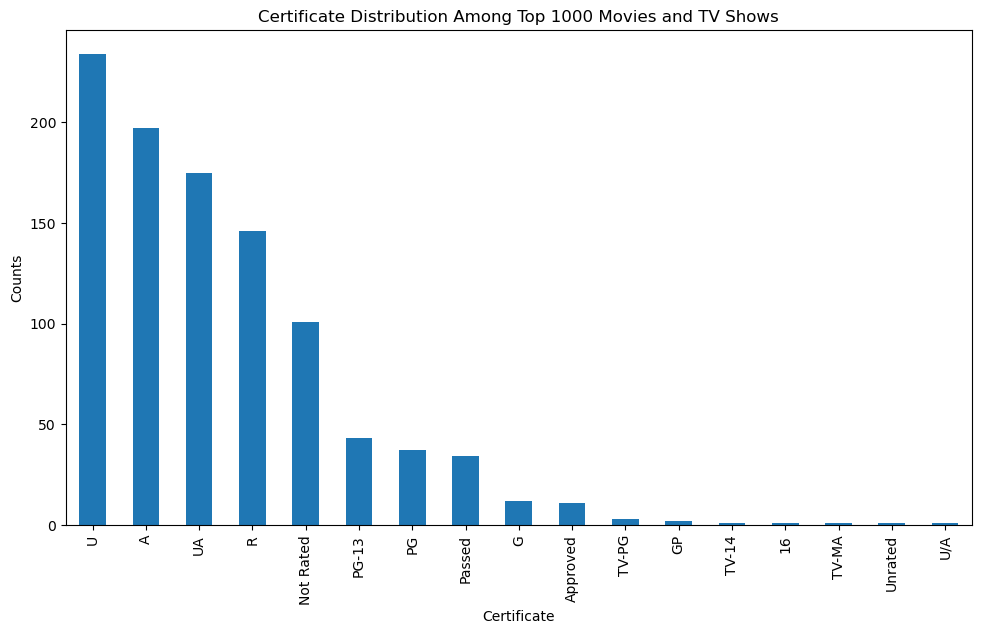

************************************************************************************************************************
				**************ANALYSIS***************

				~~ U Certificate is the most Common Certificate.
************************************************************************************************************************


In [21]:
plt.figure(figsize=(10, 6))
plt.title('Certificate Distribution Among Top 1000 Movies and TV Shows')
plt.xlabel('Certificate')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.tight_layout()
certificate_counts.plot(kind='bar')
plt.show()
print(("*")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n\t\t\t\t~~ U Certificate is the most Common Certificate.") 
print(("*")*120)

### 2)How does the average IMDb rating vary for different certificate categories (e.g., G, PG-13, R) among the top 1000 list?

In [22]:
certificate_ratings = imdb_data.groupby('Certificate')['IMDB_Rating'].mean().reset_index()
certificate_ratings

,Certificate,IMDB_Rating
0,16,8.100000
1,A,7.998985
2,Approved,7.945455
3,G,8.000000
4,GP,7.850000
5,Not Rated,7.931683
6,PG,7.927027
7,PG-13,7.797674
8,Passed,8.020588
9,R,7.869863


In [23]:
certificate_ratings_sorted = certificate_ratings.sort_values(by='IMDB_Rating', ascending=False)
certificate_ratings_sorted

,Certificate,IMDB_Rating
10,TV-14,8.300000
0,16,8.100000
11,TV-MA,8.100000
16,Unrated,8.100000
8,Passed,8.020588
3,G,8.000000
1,A,7.998985
13,U,7.976923
15,UA,7.957143
2,Approved,7.945455


************************************************************************************************************************
				**************ANALYSIS***************

				~~ TV-14 Certificate has maximum average IMDB rating 
				U/A Certificate has minimum average IMDB rating and U/A.
************************************************************************************************************************


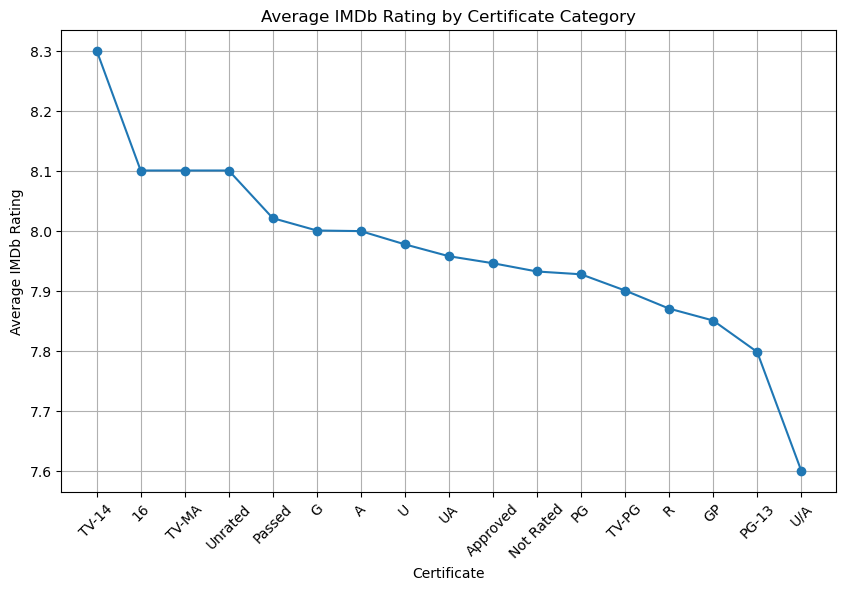

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(certificate_ratings_sorted['Certificate'], certificate_ratings_sorted['IMDB_Rating'], marker='o', linestyle='-')
plt.title('Average IMDb Rating by Certificate Category')
plt.xlabel('Certificate')
plt.ylabel('Average IMDb Rating')
plt.xticks(rotation=45)
plt.grid(True)
print(("*")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n\t\t\t\t~~ TV-14 Certificate has maximum average IMDB rating \n\t\t\t\tU/A Certificate has minimum average IMDB rating and U/A.") 
print(("*")*120)

### 3)Identify the top 5 actors/actresses (Star1, Star2, Star3, Star4) who appear most frequently in the dataset.

In [25]:
all_stars = pd.concat([imdb_data['Star1'], imdb_data['Star2'], imdb_data['Star3'], imdb_data['Star4']])
star_counts = all_stars.value_counts()
top_stars = star_counts.head(5)
print("Top 5 actors/actresses who appear most frequently in the dataset:")
print(top_stars)


Top 5 actors/actresses who appear most frequently in the dataset:
Robert De Niro    17
Tom Hanks         14
Al Pacino         13
Clint Eastwood    12
Brad Pitt         12
dtype: int64


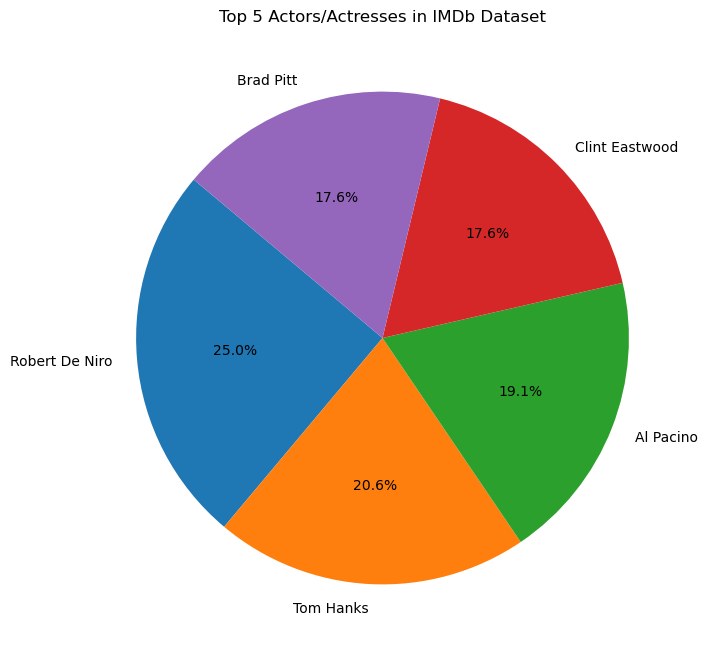

************************************************************************************************************************
				**************ANALYSIS***************

			~~Robert De Niro is top Actor appeared most frequently in the IMDB dataset.
************************************************************************************************************************


In [26]:
plt.figure(figsize=(8, 8))
top_stars.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Actors/Actresses in IMDb Dataset')
plt.show()
print(("*")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n\t\t\t~~Robert De Niro is top Actor appeared most frequently in the IMDB dataset.") 
print(("*")*120)

### 4)How many movies in the IMDb dataset of top 1000 movies and TV shows have "John" in the name of their director?

In [27]:
movies_with_john_director = imdb_data[imdb_data['Director'].str.contains('John', case=False)]
movies_with_john_director

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
101,https://m.media-amazon.com/images/M/MV5BMDU2ZW...,Toy Story,1995,U,81,"Animation, Adventure, Comedy",8.3,A cowboy doll is profoundly threatened and jea...,95.00000,John Lasseter,Tom Hanks,Tim Allen,Don Rickles,Jim Varney,887429,1.917962e+08
171,https://m.media-amazon.com/images/M/MV5BZjRlND...,Die Hard,1988,A,132,"Action, Thriller",8.2,An NYPD officer tries to save his wife and sev...,72.00000,John McTiernan,Bruce Willis,Alan Rickman,Bonnie Bedelia,Reginald VelJohnson,793164,8.300885e+07
179,https://m.media-amazon.com/images/M/MV5BNzA2Nm...,The Great Escape,1963,U,172,"Adventure, Drama, History",8.2,Allied prisoners of war plan for several hundr...,86.00000,John Sturges,Steve McQueen,James Garner,Richard Attenborough,Charles Bronson,224730,1.210000e+07
191,https://m.media-amazon.com/images/M/MV5BOTJlZW...,The Treasure of the Sierra Madre,1948,Passed,126,"Adventure, Drama, Western",8.2,Two Americans searching for work in Mexico con...,98.00000,John Huston,Humphrey Bogart,Walter Huston,Tim Holt,Bruce Bennett,114304,5.014000e+06
271,https://m.media-amazon.com/images/M/MV5BNGViZW...,The Thing,1982,A,109,"Horror, Mystery, Sci-Fi",8.1,A research team in Antarctica is hunted by a s...,57.00000,John Carpenter,Kurt Russell,Wilford Brimley,Keith David,Richard Masur,371271,1.378284e+07
279,https://m.media-amazon.com/images/M/MV5BMTY5MD...,Rocky,1976,U,120,"Drama, Sport",8.1,A small-time boxer gets a supremely rare chanc...,70.00000,John G. Avildsen,Sylvester Stallone,Talia Shire,Burt Young,Carl Weathers,518546,1.172352e+08
295,https://m.media-amazon.com/images/M/MV5BMGEyNz...,The Man Who Shot Liberty Valance,1962,Not Rated,123,"Drama, Western",8.1,A senator returns to a western town for the fu...,94.00000,John Ford,James Stewart,John Wayne,Vera Miles,Lee Marvin,68827,6.803475e+07
456,https://m.media-amazon.com/images/M/MV5BZjIwNG...,The Maltese Falcon,1941,Not Rated,100,"Film-Noir, Mystery",8.0,A private detective takes on a case that invol...,96.00000,John Huston,Humphrey Bogart,Mary Astor,Gladys George,Peter Lorre,148928,2.108060e+06
457,https://m.media-amazon.com/images/M/MV5BNzJiOG...,The Grapes of Wrath,1940,Passed,129,"Drama, History",8.0,A poor Midwest family is forced off their land...,96.00000,John Ford,Henry Fonda,Jane Darwell,John Carradine,Charley Grapewin,85559,5.500000e+04
463,https://m.media-amazon.com/images/M/MV5BMGUwZj...,Knives Out,2019,UA,130,"Comedy, Crime, Drama",7.9,A detective investigates the death of a patria...,82.00000,Rian Johnson,Daniel Craig,Chris Evans,Ana de Armas,Jamie Lee Curtis,454203,1.653598e+08


In [28]:
total_movies_with_john_director = len(movies_with_john_director)
print("Total number of movies with 'John' in the director's name:", total_movies_with_john_director)

Total number of movies with 'John' in the director's name: 36


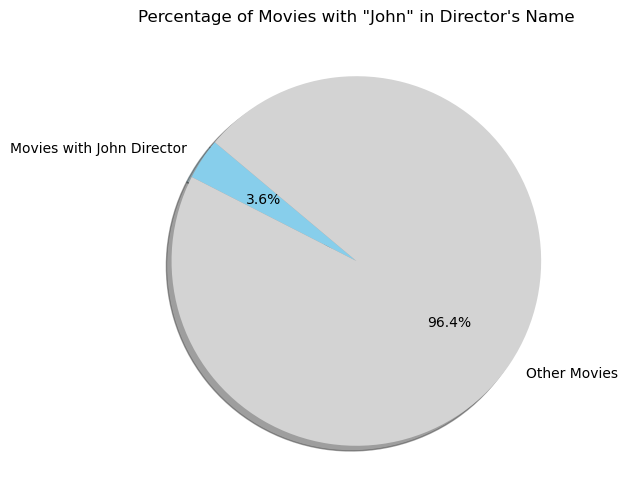

************************************************************************************************************************
				**************ANALYSIS***************

	~~3.6% of movies in the IMDb dataset of top 1000 movies and TV shows have John in the name of their director.
************************************************************************************************************************


In [29]:
labels = ['Movies with John Director', 'Other Movies']
sizes = [total_movies_with_john_director, len(imdb_data) - total_movies_with_john_director]
colors = ['skyblue', 'lightgray']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Movies with "John" in Director\'s Name')
plt.show()
print(("*")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n\t~~3.6% of movies in the IMDb dataset of top 1000 movies and TV shows have John in the name of their director.") 
print(("*")*120)

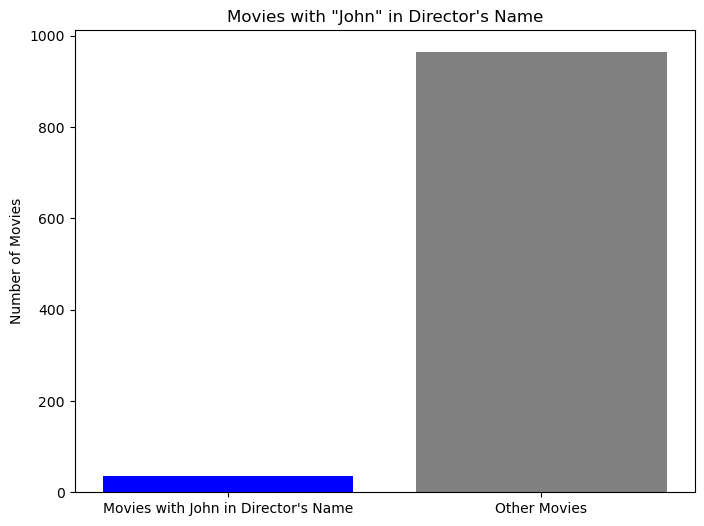

In [30]:
plt.figure(figsize=(8, 6))
plt.bar(['Movies with John in Director\'s Name', 'Other Movies'], [total_movies_with_john_director, len(imdb_data) - total_movies_with_john_director], color=['blue', 'gray'])
plt.ylabel('Number of Movies')
plt.title('Movies with "John" in Director\'s Name')
plt.xticks(rotation=0)
plt.show()

### 5)Find and display the details (Movies_Title, Released_Year, and IMDB_Rating) of all movies and TV shows released in the year 2000 or later in the IMDb dataset?

In [31]:
recent_movies_and_shows = imdb_data.loc[imdb_data['Released_Year'] >= 2000, ['Movies_Title', 'Released_Year', 'IMDB_Rating']]

In [32]:
print("Details of movies and TV shows released in the year 2000 or later:")
recent_movies_and_shows

Details of movies and TV shows released in the year 2000 or later:


,Movies_Title,Released_Year,IMDB_Rating
2,The Dark Knight,2008,9.0
5,The Lord of the Rings: The Return of the King,2003,8.9
8,Inception,2010,8.8
10,The Lord of the Rings: The Fellowship of the Ring,2001,8.8
13,The Lord of the Rings: The Two Towers,2002,8.7
...,...,...,...
948,The Others,2001,7.6
949,Blow,2001,7.6
950,Enemy at the Gates,2001,7.6
951,Minority Report,2002,7.6


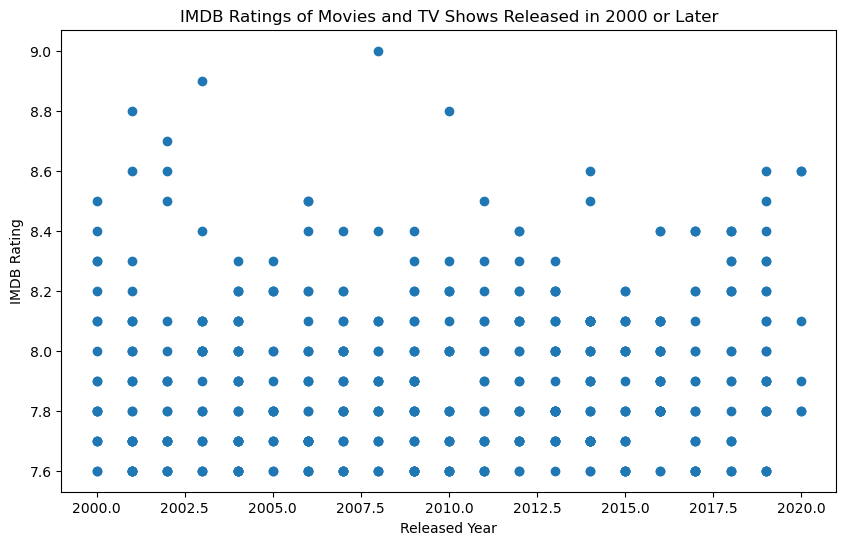

In [33]:
plt.figure(figsize=(10, 6))
plt.scatter(recent_movies_and_shows['Released_Year'], recent_movies_and_shows['IMDB_Rating'])
plt.xlabel('Released Year')
plt.ylabel('IMDB Rating')
plt.title('IMDB Ratings of Movies and TV Shows Released in 2000 or Later')
plt.show()

### 6)display the movie or TV show with the shortest overview (mini story/summary) directed by a specific director (e.g., Christopher Nolan)? 

In [34]:
director_name = "Christopher Nolan"
movies_by_director = imdb_data.loc[imdb_data['Director'] == director_name]
movies_by_director

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
8,https://m.media-amazon.com/images/M/MV5BMjAxMz...,Inception,2010,UA,148,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,292576195.0
21,https://m.media-amazon.com/images/M/MV5BZjdkOT...,Interstellar,2014,UA,169,"Adventure, Drama, Sci-Fi",8.6,A team of explorers travel through a wormhole ...,74.0,Christopher Nolan,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Mackenzie Foy,1512360,188020017.0
36,https://m.media-amazon.com/images/M/MV5BMjA4ND...,The Prestige,2006,U,130,"Drama, Mystery, Sci-Fi",8.5,"After a tragic accident, two stage magicians e...",66.0,Christopher Nolan,Christian Bale,Hugh Jackman,Scarlett Johansson,Michael Caine,1190259,53089891.0
63,https://m.media-amazon.com/images/M/MV5BMTk4OD...,The Dark Knight Rises,2012,UA,164,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099.0
69,https://m.media-amazon.com/images/M/MV5BZTcyNj...,Memento,2000,UA,113,"Mystery, Thriller",8.4,A man with short-term memory loss attempts to ...,80.0,Christopher Nolan,Guy Pearce,Carrie-Anne Moss,Joe Pantoliano,Mark Boone Junior,1125712,25544867.0
155,https://m.media-amazon.com/images/M/MV5BOTY4Yj...,Batman Begins,2005,UA,140,"Action, Adventure",8.2,"After training with his mentor, Batman begins ...",70.0,Christopher Nolan,Christian Bale,Michael Caine,Ken Watanabe,Liam Neeson,1308302,206852432.0
573,https://m.media-amazon.com/images/M/MV5BN2YyZj...,Dunkirk,2017,UA,106,"Action, Drama, History",7.8,"Allied soldiers from Belgium, the British Empi...",94.0,Christopher Nolan,Fionn Whitehead,Barry Keoghan,Mark Rylance,Tom Hardy,555092,188373161.0


In [35]:
shortest_overview_movie = movies_by_director.loc[movies_by_director['Overview'].str.len().idxmin()]
shortest_overview_movie

Poster_Link      https://m.media-amazon.com/images/M/MV5BZTcyNj...
Movies_Title                                               Memento
Released_Year                                                 2000
Certificate                                                     UA
Runtime                                                        113
Genre                                            Mystery, Thriller
IMDB_Rating                                                    8.4
Overview         A man with short-term memory loss attempts to ...
Meta_score                                                    80.0
Director                                         Christopher Nolan
Star1                                                   Guy Pearce
Star2                                             Carrie-Anne Moss
Star3                                               Joe Pantoliano
Star4                                            Mark Boone Junior
No_of_Votes                                                112

In [36]:
print("Movie or TV Show with the Shortest Overview Directed by", director_name)
print("Title:", shortest_overview_movie['Movies_Title'])
print("Overview:", shortest_overview_movie['Overview'])

Movie or TV Show with the Shortest Overview Directed by Christopher Nolan
Title: Memento
Overview: A man with short-term memory loss attempts to track down his wife's murderer.


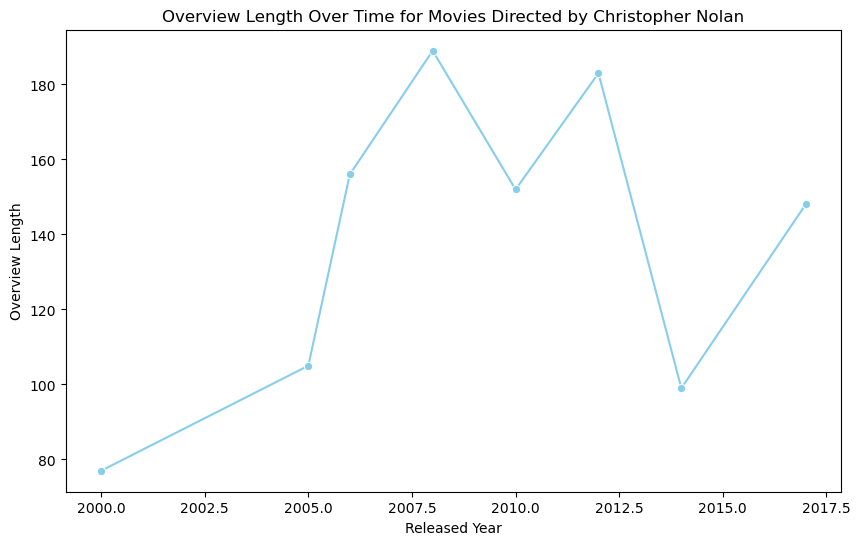

************************************************************************************************************************
				**************ANALYSIS***************

~~Shortest overview (mini story/summary) directed by a specific director (e.g., Christopher Nolan) is present in year 2000.
************************************************************************************************************************


In [37]:
overview_lengths = [len(overview) for overview in movies_by_director['Overview']]
plt.figure(figsize=(10, 6))
sns.lineplot(x=movies_by_director['Released_Year'], y=overview_lengths, marker='o', color='skyblue')
plt.xlabel('Released Year')
plt.ylabel('Overview Length')
plt.title('Overview Length Over Time for Movies Directed by ' + director_name)
plt.show()
print(("*")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n~~Shortest overview (mini story/summary) directed by a specific director (e.g., Christopher Nolan) is present in year 2000.") 
print(("*")*120)

### 7)Find and display the name of the movie and its director with the highest IMDb rating in the IMDb dataset of top 1000 movies and TV shows?"

In [38]:
highest_rating_row = imdb_data.loc[imdb_data['IMDB_Rating'].idxmax()]
highest_rating_row

Poster_Link      https://m.media-amazon.com/images/M/MV5BMDFkYT...
Movies_Title                              The Shawshank Redemption
Released_Year                                                 1994
Certificate                                                      A
Runtime                                                        142
Genre                                                        Drama
IMDB_Rating                                                    9.3
Overview         Two imprisoned men bond over a number of years...
Meta_score                                                    80.0
Director                                            Frank Darabont
Star1                                                  Tim Robbins
Star2                                               Morgan Freeman
Star3                                                   Bob Gunton
Star4                                               William Sadler
No_of_Votes                                                234

In [39]:
movie_title = highest_rating_row['Movies_Title']
director = highest_rating_row['Director']

In [40]:
print("Movie with the Highest IMDb Rating:")
print("Title:", movie_title)
print("Director:", director)

Movie with the Highest IMDb Rating:
Title: The Shawshank Redemption
Director: Frank Darabont


### 8)What are the minimum, maximum, and average runtimes of movies and TV shows in the IMDb dataset of the top 1000 titles?

In [42]:
min_runtime = imdb_data['Runtime'].min()
max_runtime = imdb_data['Runtime'].max()
average_runtime = imdb_data['Runtime'].mean()


In [43]:
print("Minimum Runtime:", min_runtime, "minutes")
print("Maximum Runtime:", max_runtime, "minutes")
print("Average Runtime:", average_runtime, "minutes")

Minimum Runtime: 45 minutes
Maximum Runtime: 321 minutes
Average Runtime: 122.891 minutes


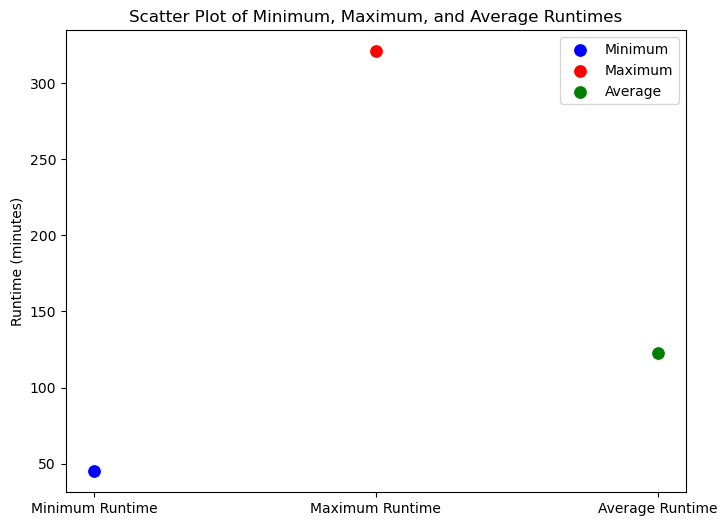

************************************************************************************************************************
				**************ANALYSIS***************

~the Minimum Runtime: 45 minutes,Maximum Runtime: 321 minutes,Average Runtime: 122.891 minutesruntimes of movies and TV shows  in the IMDb dataset of the top 1000 titles
************************************************************************************************************************


In [44]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=['Minimum Runtime'], y=[min_runtime], color='blue', label='Minimum', s=100)
sns.scatterplot(x=['Maximum Runtime'], y=[max_runtime], color='red', label='Maximum', s=100)
sns.scatterplot(x=['Average Runtime'], y=[average_runtime], color='green', label='Average', s=100)
plt.ylabel('Runtime (minutes)')
plt.title('Scatter Plot of Minimum, Maximum, and Average Runtimes')
plt.show()
print(("*")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n~the Minimum Runtime: 45 minutes,Maximum Runtime: 321 minutes,Average Runtime: 122.891 minutesruntimes of movies and TV shows  in the IMDb dataset of the top 1000 titles")
print(("*")*120)

### 9)How many movies and TV shows in the IMDb dataset were released in the 2000s and have an IMDb rating greater than 8.0?

In [45]:
movies_2000s = imdb_data[(imdb_data['Released_Year'] >= 2000) & (imdb_data['Released_Year'] <= 2009)]
len(movies_2000s)

237

In [46]:
high_rated_movies_2000s = movies_2000s[movies_2000s['IMDB_Rating'] > 8.0]
high_rated_movies_2000s

,Poster_Link,Movies_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.00000,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,5.348584e+08
5,https://m.media-amazon.com/images/M/MV5BNzA5ZD...,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.00000,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,3.778459e+08
10,https://m.media-amazon.com/images/M/MV5BN2EyZj...,The Lord of the Rings: The Fellowship of the Ring,2001,U,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.00000,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,3.155448e+08
13,https://m.media-amazon.com/images/M/MV5BZGMxZT...,The Lord of the Rings: The Two Towers,2002,UA,179,"Action, Adventure, Drama",8.7,While Frodo and Sam edge closer to Mordor with...,87.00000,Peter Jackson,Elijah Wood,Ian McKellen,Viggo Mortensen,Orlando Bloom,1485555,3.425514e+08
22,https://m.media-amazon.com/images/M/MV5BOTMwYj...,Cidade de Deus,2002,A,130,"Crime, Drama",8.6,"In the slums of Rio, two kids' paths diverge a...",79.00000,Fernando Meirelles,Kátia Lund,Alexandre Rodrigues,Leandro Firmino,Matheus Nachtergaele,699256,7.563397e+06
23,https://m.media-amazon.com/images/M/MV5BMjlmZm...,Sen to Chihiro no kamikakushi,2001,U,125,"Animation, Adventure, Family",8.6,"During her family's move to the suburbs, a sul...",96.00000,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,651376,1.005586e+07
36,https://m.media-amazon.com/images/M/MV5BMjA4ND...,The Prestige,2006,U,130,"Drama, Mystery, Sci-Fi",8.5,"After a tragic accident, two stage magicians e...",66.00000,Christopher Nolan,Christian Bale,Hugh Jackman,Scarlett Johansson,Michael Caine,1190259,5.308989e+07
37,https://m.media-amazon.com/images/M/MV5BMTI1MT...,The Departed,2006,A,151,"Crime, Drama, Thriller",8.5,An undercover cop and a mole in the police att...,85.00000,Martin Scorsese,Leonardo DiCaprio,Matt Damon,Jack Nicholson,Mark Wahlberg,1189773,1.323843e+08
38,https://m.media-amazon.com/images/M/MV5BOWRiZD...,The Pianist,2002,R,150,"Biography, Drama, Music",8.5,A Polish Jewish musician struggles to survive ...,85.00000,Roman Polanski,Adrien Brody,Thomas Kretschmann,Frank Finlay,Emilia Fox,729603,3.257258e+07
39,https://m.media-amazon.com/images/M/MV5BMDliMm...,Gladiator,2000,UA,155,"Action, Adventure, Drama",8.5,A former Roman General sets out to exact venge...,67.00000,Ridley Scott,Russell Crowe,Joaquin Phoenix,Connie Nielsen,Oliver Reed,1341460,1.877054e+08


In [47]:
total_high_rated_movies_2000s = len(high_rated_movies_2000s)
total_high_rated_movies_2000s

58

In [48]:
print("Number of movies and TV shows released in the 2000s with IMDb rating > 8.0:", total_high_rated_movies_2000s)

Number of movies and TV shows released in the 2000s with IMDb rating > 8.0: 58


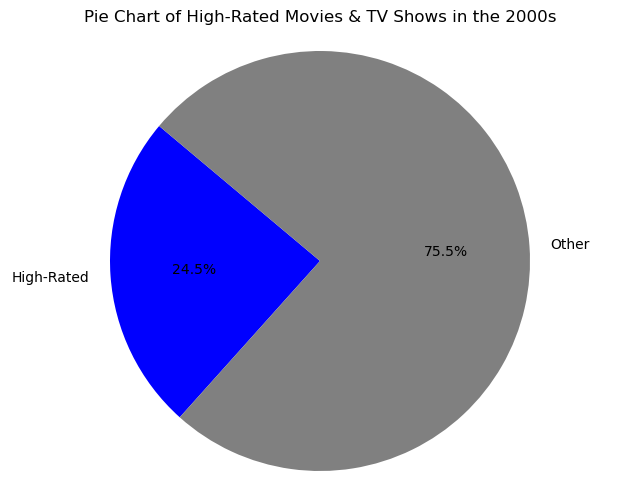

************************************************************************************************************************
				**************ANALYSIS***************

~~24.5% movies and TV shows in the IMDb dataset were released in the 2000s and have an IMDb rating greater than 8.0
************************************************************************************************************************


In [49]:
labels = ['High-Rated', 'Other']
sizes = [total_high_rated_movies_2000s, len(movies_2000s)-total_high_rated_movies_2000s]
colors = ['blue', 'gray']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of High-Rated Movies & TV Shows in the 2000s')
plt.axis('equal')
plt.show()
print(("*")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n~~24.5% movies and TV shows in the IMDb dataset were released in the 2000s and have an IMDb rating greater than 8.0") 
print(("*")*120)

### 10)Correlation between the IMDb ratings and the number of votes received by movies and TV shows in the dataset?

In [50]:
correlation_matrix = imdb_data[['IMDB_Rating', 'No_of_Votes']].corr()
correlation_matrix 

,IMDB_Rating,No_of_Votes
IMDB_Rating,1.000000,0.494979
No_of_Votes,0.494979,1.000000


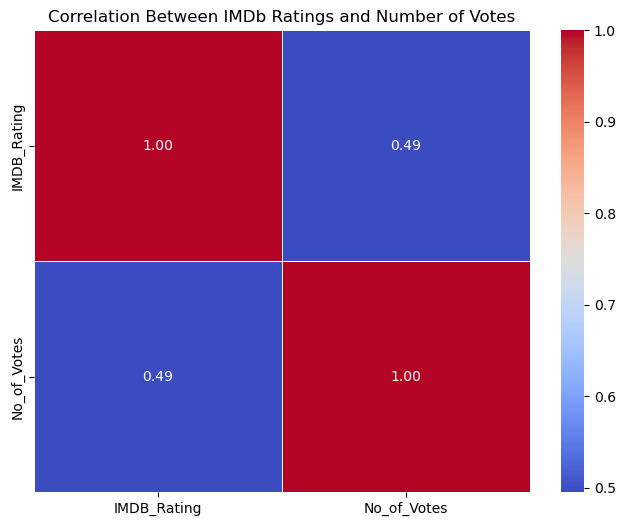

************************************************************************************************************************
				**************ANALYSIS***************

~~Correlation coefficient of 0.495 suggests a positive relationship, but it's not extremely strong.
************************************************************************************************************************


In [51]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Between IMDb Ratings and Number of Votes')
plt.show()
print(("*")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n~~Correlation coefficient of 0.495 suggests a positive relationship, but it's not extremely strong.") 
print(("*")*120)

### 11)Correlation between IMDb ratings and the gross earnings of the top 1000 movies and TV shows in the dataset?

In [52]:
correlation_matrix = imdb_data[['IMDB_Rating', 'Gross']].corr()
correlation_matrix

,IMDB_Rating,Gross
IMDB_Rating,1.000000,0.089881
Gross,0.089881,1.000000


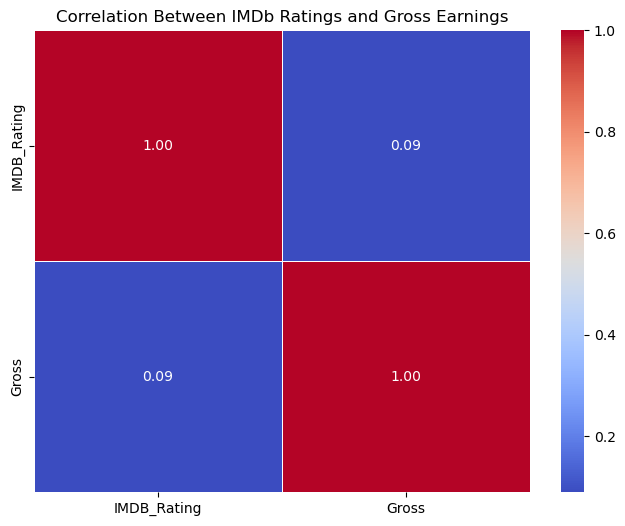

************************************************************************************************************************
				**************ANALYSIS***************

~Correlation coefficient of 0.090 suggests a very weak positive relationship, almost close to no relationship, between IMDb ratings and gross earnings.
************************************************************************************************************************


In [53]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Between IMDb Ratings and Gross Earnings')
plt.show()
print(("*")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n~Correlation coefficient of 0.090 suggests a very weak positive relationship, almost close to no relationship, between IMDb ratings and gross earnings.") 
print(("*")*120)

### 11)How many times has a specific actor/actress (e.g., Tom Hanks) appeared in movies directed by a particular director (e.g., Steven Spielberg)?

In [54]:
actor_name = "Tom Hanks"
director_name = "Steven Spielberg"
director_movies = imdb_data[imdb_data['Director'] == director_name]
len(director_movies)

13

In [55]:
actor_appearances = director_movies[
    (director_movies['Star1'] == actor_name) |
    (director_movies['Star2'] == actor_name) |
    (director_movies['Star3'] == actor_name) |
    (director_movies['Star4'] == actor_name)
].shape
actor_appearances 

(3, 16)

In [56]:
actor_appearances = director_movies[
    (director_movies['Star1'] == actor_name) |
    (director_movies['Star2'] == actor_name) |
    (director_movies['Star3'] == actor_name) |
    (director_movies['Star4'] == actor_name)
].shape[0]
actor_appearances 

3

In [57]:
actor_appearances = director_movies[
    (director_movies['Star1'] == actor_name) |
    (director_movies['Star2'] == actor_name) |
    (director_movies['Star3'] == actor_name) |
    (director_movies['Star4'] == actor_name)
].shape[0]
print(f"{actor_name} appeared {actor_appearances} times in movies directed by {director_name}.")

Tom Hanks appeared 3 times in movies directed by Steven Spielberg.


In [58]:
director_movies.shape[0]

13

In [59]:
movies_without_actor_TomHanks = director_movies.shape[0] - actor_appearances
movies_without_actor_TomHanks

10

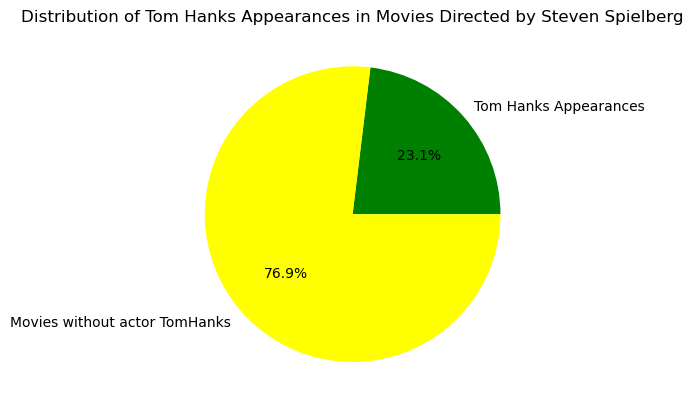

************************************************************************************************************************
				**************ANALYSIS***************

	~Tom Hanks  appeared in23.3% of movies directed by a particular director (e.g., Steven Spielberg).
************************************************************************************************************************


In [60]:
labels = [f'{actor_name} Appearances', 'Movies without actor TomHanks']
sizes = [actor_appearances, movies_without_actor_TomHanks]
colors = ['green', 'yellow']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title(f'Distribution of {actor_name} Appearances in Movies Directed by {director_name}')
plt.show()
print(("*")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n\t~Tom Hanks  appeared in23.3% of movies directed by a particular director (e.g., Steven Spielberg).") 
print(("*")*120)

### 12)What is the highest and lowest IMDb rating among the top 1000 movies and TV shows?

In [64]:
highest_rating = imdb_data['IMDB_Rating'].max()
lowest_rating = imdb_data['IMDB_Rating'].min()

print(f"The highest IMDb rating among the top 1000 movies and TV shows is: {highest_rating:.2f}")
print(f"The lowest IMDb rating among the top 1000 movies and TV shows is: {lowest_rating:.2f}")

The highest IMDb rating among the top 1000 movies and TV shows is: 9.30
The lowest IMDb rating among the top 1000 movies and TV shows is: 7.60


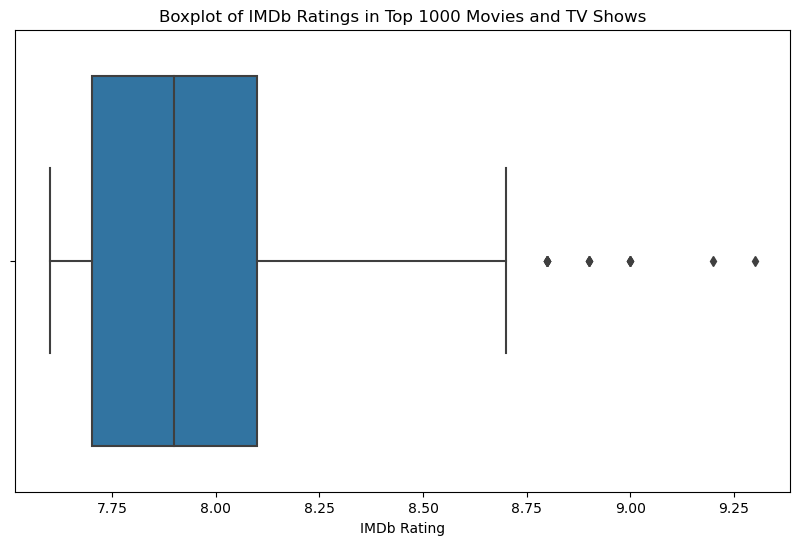

************************************************************************************************************************
				**************ANALYSIS***************

		~The highest IMDb rating among the top 1000 movies and TV shows is: 9.30.
		The lowest IMDb rating among the top 1000 movies and TV shows is: 7.60. 
************************************************************************************************************************


In [65]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=imdb_data, x='IMDB_Rating')
plt.title('Boxplot of IMDb Ratings in Top 1000 Movies and TV Shows')
plt.xlabel('IMDb Rating')
plt.show()
print(("*")*120)
print("\t\t\t\t**************ANALYSIS***************\n\n\t\t~The highest IMDb rating among the top 1000 movies and TV shows is: 9.30.\n\t\tThe lowest IMDb rating among the top 1000 movies and TV shows is: 7.60. ") 
print(("*")*120)

<Figure size 1200x600 with 0 Axes>

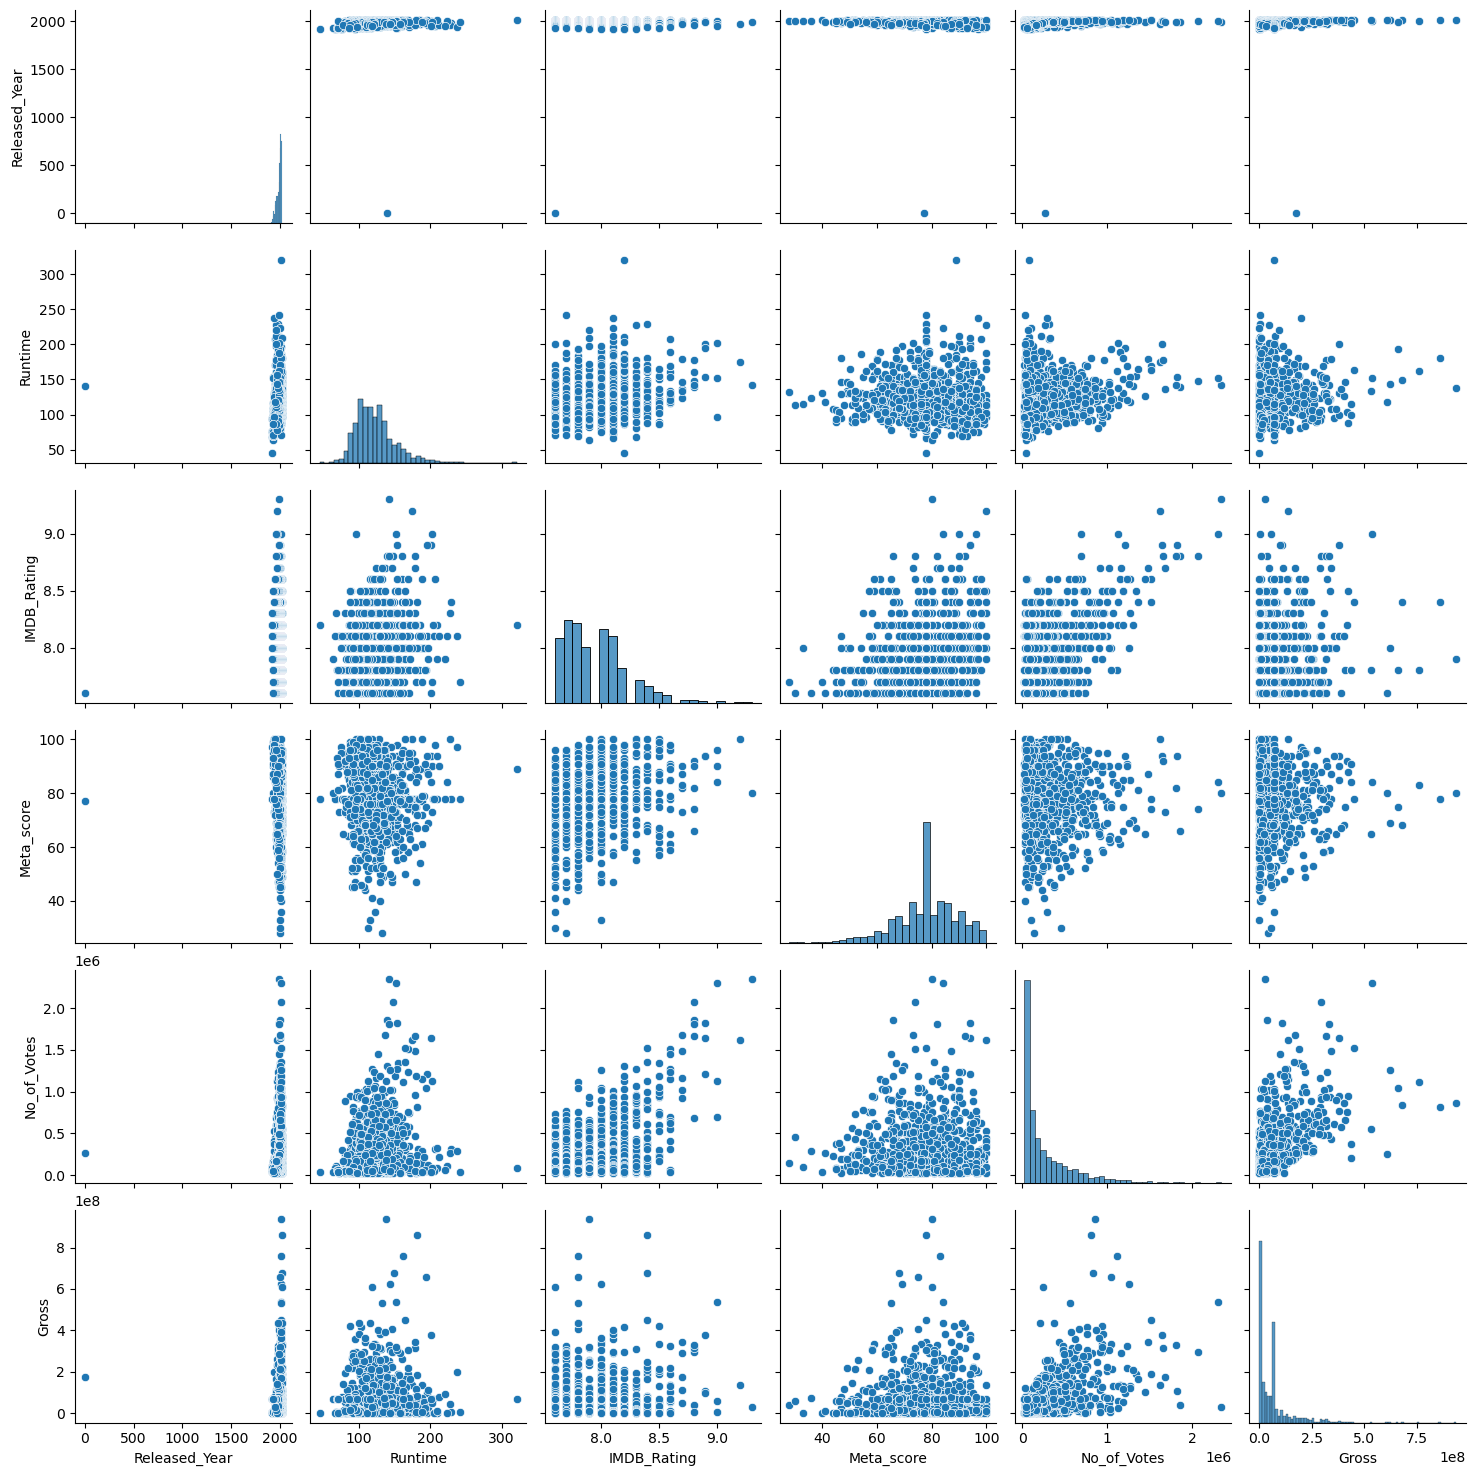

In [66]:
plt.figure(figsize=(12, 6))
sns.pairplot(imdb_data)
plt.show()